Used Car Price Prediction

Predict the price of an unknown car. Build your own Algo for cars 24 !!

KAGGLE: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?resource=download

-----------------------------

# Introdução:

Esse foi o primeiro projeto quando decidi me aprofundar no mundo de data science, iniciei com um problema de aprendizado supervisionado, onde utilizamos regressão linear e pude testar diversos modelos diferentes, aprofundar na exploração dos dados e na análise visual destes, gastar um tempinho com a prep até achar um encorder e um scaler adequados e também manipular muito bem os dados a fim de encontrar inconsistências e poder limpar para que todas as etapas acima tivessem o melhor resultado.

Escolhi esse banco de dados, pois o objetivo do estudo é gerar um modelo que seja capaz de predizer o valor de um carro a partir de suas caracteristícas. E quando vi esse problema me lembrei do meu pai, que teve uma loja de carros por mais de 20 anos e se eu tivesse esse conhecimento naquela época (no auge dos 2 anos de idade kkkkkk) poderia ter ajudado ele a otimizar a compra e vendas dos carros.

# Imports

In [236]:
# Imports + Tratamentos
import pandas as pd
import numpy as np

#Visualização
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

# Leitura dos Dados

In [132]:
way = r'..\Used Cars Price Prediction\archive (2)\train-data.csv'

train = pd.read_csv(way)

In [90]:
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


### Dicionário

* Name: The brand and model of the car.
* Location: The location in which the car is being sold or is available for purchase.
* Year: The year or edition of the model.
* Kilometers_Drive: The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type: The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)
* Transmission: The type of transmission used by the car. (Automatic / Manual)
* Owner_Type: Whether the ownership is Firsthand, Second hand or other.
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in cc.
* Power: The maximum power of the engine in bhp.
* Seats: The number of seats in the car.
* New_Price: The price of a new car of the same model.
* Price: The price of the used car in INR Lakhs.

### Informações sobre os Dados

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Análise Exploratória

## Gerando um relatório para uma breve análise

In [92]:
from pandas_profiling import *
profile = ProfileReport(train, title="Pandas Profiling Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pontos de destaque:

* Transmissão tem forte correlação com o Preço
* O Ano tem correlação média pra forte com o Preço
* Há muitos carros das marcas Maruti, Hyunai e Honda

## Separando nosso conjunto de treino e validação.

----------------- 
Como o ano é muito correlacionado com o preço do carro, e sua distribuição aparenta ser assimétrica, vamos realizar a divisão estratificada, para que tenhamos certeza que nosso modelo tenha de exemplo carros de cada ano do nosso dataset.

In [133]:
# Dropando a colunas que veio como index

train.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

cols = train.columns.values
target = 'Price'

X_cols = [x for x in cols if x != target]
X = train[X_cols]
y = train[target]

anos = train['Year'].unique()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["Year"]):
    strat_train_set = train.loc[train_index]
    strat_val_set = train.loc[test_index]

### Primeiras Transformações 
-------------
#### Coletando a Marca do Veículo.

Vamos criar uma coluna chamada Brand, que armazenará a marca daquele carro, como podemos ver sempre a primeira palavra em Name' é a marca daquele carro, e mesmo que esse nome seja composto, o primeiro nomde já será o suficiente para nós.


In [95]:
def marcas(df, col):
    df['Brand'] = df[col].apply(lambda x: x.split(' ')[0])

marcas(strat_train_set, 'Name')    

strat_train_set.drop(['Name'], axis = 1, inplace = True)

#### Tranformando as colunas numericas que estão como object para o formato numerico

In [96]:
strat_train_set.New_Price = pd.to_numeric(strat_train_set.New_Price.str.split().str[0], errors='coerce')
strat_train_set.Mileage = pd.to_numeric(strat_train_set.Mileage.str.split().str[0], errors='coerce')
strat_train_set.Engine = pd.to_numeric(strat_train_set.Engine.str.split().str[0], errors='coerce')
strat_train_set.Power = pd.to_numeric(strat_train_set.Power.str.split().str[0], errors='coerce')

In [97]:
strat_train_set.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,4815.000000,4815.000000,4814.000000,4790.000000,4706.000000,4786.000000,659.000000,4815.000000
mean,2013.358463,57751.500519,18.157121,1617.584134,112.872892,5.281028,20.684522,9.390293
std,3.270117,38440.982658,4.578753,597.700515,53.483721,0.803729,20.296788,10.974968
min,1998.000000,171.000000,0.000000,624.000000,34.200000,2.000000,1.000000,0.440000
25%,2011.000000,34000.000000,15.200000,1198.000000,75.000000,5.000000,7.910000,3.500000
50%,2014.000000,53702.000000,18.160000,1493.000000,94.000000,5.000000,11.520000,5.640000
75%,2016.000000,72998.000000,21.100000,1968.000000,138.100000,5.000000,25.335000,9.900000
max,2019.000000,775000.000000,33.540000,5998.000000,552.000000,10.000000,95.380000,160.000000


In [98]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 4813 to 1121
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4815 non-null   object 
 1   Year               4815 non-null   int64  
 2   Kilometers_Driven  4815 non-null   int64  
 3   Fuel_Type          4815 non-null   object 
 4   Transmission       4815 non-null   object 
 5   Owner_Type         4815 non-null   object 
 6   Mileage            4814 non-null   float64
 7   Engine             4790 non-null   float64
 8   Power              4706 non-null   float64
 9   Seats              4786 non-null   float64
 10  New_Price          659 non-null    float64
 11  Price              4815 non-null   float64
 12  Brand              4815 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 526.6+ KB


In [99]:
strat_train_set.groupby(['Brand'])['Price'].mean().sort_values(ascending = False)[:10]

Brand
Bentley          59.000000
Porsche          50.530714
Land             40.771000
Jaguar           36.035758
Mini             27.560000
Mercedes-Benz    26.484644
Audi             25.124550
BMW              24.856256
Volvo            20.223571
Isuzu            20.000000
Name: Price, dtype: float64

In [100]:
pd.pivot_table(strat_train_set, index = ['Brand', 'Location'],
               values='Price', aggfunc = 'mean').sort_values('Price', ascending=False).head(20)

Price
Brand         Location             
Porsche       Kolkata     69.500000
              Delhi       61.250000
Bentley       Hyderabad   59.000000
Porsche       Coimbatore  55.370000
              Kochi       53.563333
Land          Kochi       53.032857
              Coimbatore  51.488000
Jaguar        Mumbai      47.875000
              Hyderabad   47.800000
Land          Hyderabad   47.104286
Jaguar        Delhi       45.375000
Land          Bangalore   45.125000
Porsche       Hyderabad   45.000000
Mini          Kolkata     39.750000
Mercedes-Benz Coimbatore  38.303636
Mini          Pune        35.000000
Land          Delhi       33.818182
BMW           Coimbatore  32.816923
Jaguar        Coimbatore  32.510000
Porsche       Mumbai      32.375000

Marcas como Porsche, Jaguar e Land Rover detem os carros mais caros em geral.

In [101]:
strat_train_set

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
4813,Coimbatore,2013,80127,Diesel,Automatic,First,12.80,1968.0,167.6,5.0,NaN,23.68,Audi
594,Hyderabad,2011,81759,Diesel,Manual,First,19.30,1248.0,73.9,5.0,NaN,4.39,Maruti
3687,Coimbatore,2017,50534,Petrol,Automatic,First,17.21,1197.0,103.5,5.0,11.66,8.27,Volkswagen
5846,Delhi,2013,60000,Petrol,Manual,First,17.92,1086.0,62.1,5.0,NaN,2.30,Hyundai
2368,Chennai,2011,143354,Diesel,Manual,Second,16.00,1997.0,140.0,7.0,NaN,6.00,Mahindra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,Pune,2013,30000,Petrol,Manual,First,22.74,796.0,47.3,5.0,NaN,2.50,Maruti
4009,Mumbai,2017,25000,Petrol,Manual,First,10.40,2393.0,163.5,5.0,NaN,9.00,Maruti
5814,Pune,2015,21000,Petrol,Manual,First,18.90,1197.0,82.0,5.0,NaN,3.75,Hyundai
5046,Coimbatore,2012,94989,Petrol,Manual,First,12.80,2354.0,177.6,5.0,NaN,6.58,Honda


## Visualização dos Dados

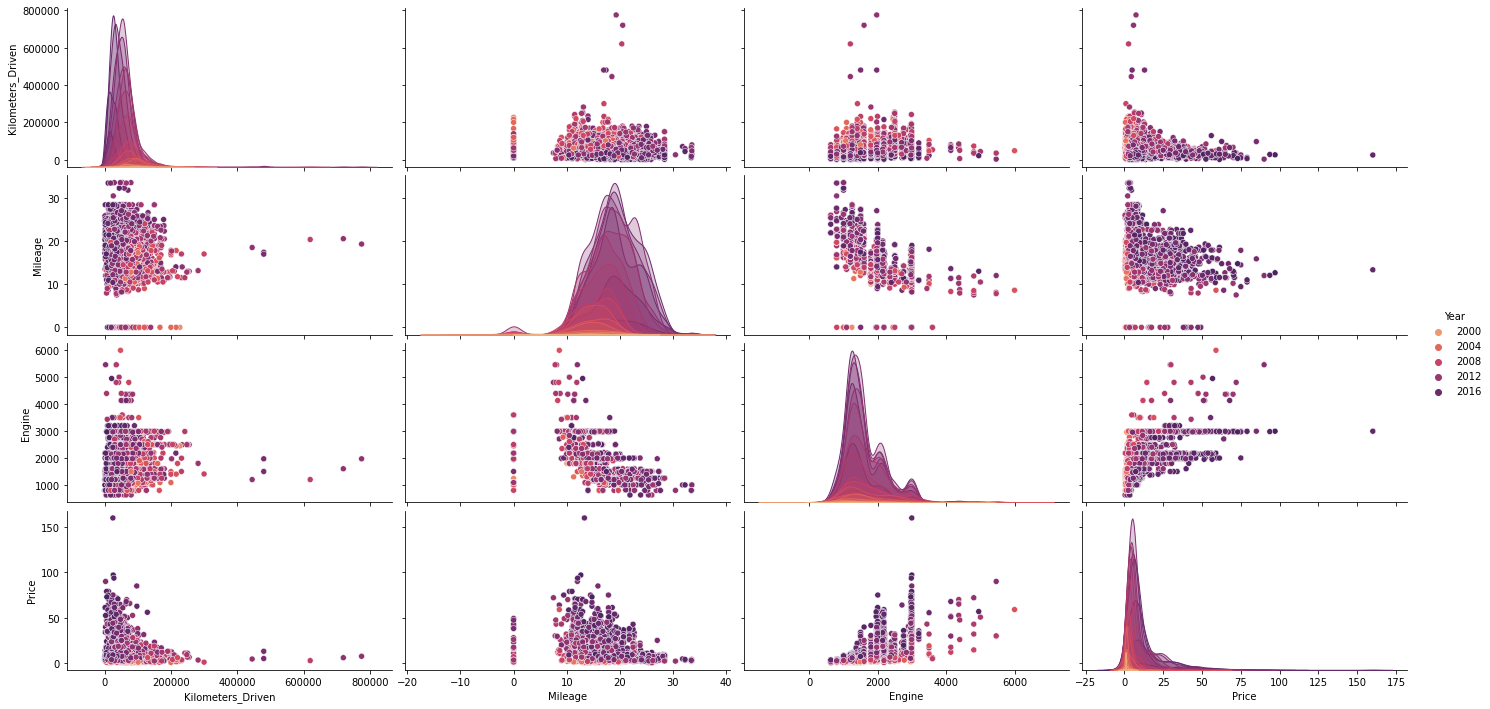

In [102]:
sns.pairplot(data = strat_train_set['Year Kilometers_Driven Mileage Engine Price'.split(' ')],
            hue = 'Year', palette = "flare", aspect = 2)

* Podemos ver com esse gráfico que é as correlações das variáveis explicativas não é são muito explícictas. Há uma relação exponencial decrescente com a kilometragem do carro e uma relação positiva com o volume do motor.

* Há uma concentração estranha de pontos acumulado no 0, vamos analisar uma amostra desses carros para tentar entender.

In [19]:
print('%i carros que apresentam 0 KM/L, %.2f porcento dos dados.' % (len(strat_train_set[strat_train_set['Mileage'] == 0]),
                                                 len(strat_train_set[strat_train_set['Mileage'] == 0])/len(strat_train_set)))
print('\nAmostra:')
strat_train_set[strat_train_set['Mileage'] == 0].sample(3)

53 carros que apresentam 0 KM/L, 0.01 porcento dos dados.

Amostra:


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
5426,Chennai,2006,85000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,NaN,1.3,Hyundai
4687,Jaipur,2012,119203,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,16.5,Land
229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.6,Ford


Por se tratar da variável que nos informa sobre a kilometragem por litro que o carro faz, não faz muito sentido ter um carro que faz 0 KM/L. E como se trata de apenas 0.01% dos dados vamos estar removendo essas observações.

In [20]:
def limpa_mileage(df):
    df = df[df.loc[:, 'Mileage'] != 0 ]

limpa_mileage(strat_train_set)

In [21]:
sns.pairplot(data = strat_train_set['Year Power Seats New_Price Price'.split(' ')],
             hue = 'Year', palette = 'flare', aspect = 2)

* Olhando para as demais características podemos ver uma correlação positiva do preço com a potência do veículo e também com o preço do carro novo.
* Podemos ver pelas cores que carros mais antigos tem menor preço que os mais novos, o que é de se esperar.
* Aparentemente temos um acumulo de carros zero kilometro custando 0, sendo que no geral o preço desses carros são mais de 20k.

In [22]:
print('%i carros que apresentam 0 KM/L, %.2f porcento dos dados.' % (len(strat_train_set[strat_train_set['New_Price'] == 0]),
                                                 len(strat_train_set[strat_train_set['New_Price'] == 0])/len(strat_train_set)))

0 carros que apresentam 0 KM/L, 0.00 porcento dos dados.


In [23]:
sns.displot((strat_train_set.New_Price / strat_train_set.Price))

Temos zero carros custando zero, voltando ao profile inicial, vi que 1% dos preços em _New_price_ está em uma medida monetária diferente *Cr*.
Pesquisando na internet encontrei que **1 Lakh Is Equal To 0.01 Crore**. Para esses casos vamos realizar a transformação monetária.

In [24]:
def tranformacao_monetaria(df):
    df['New_Price'] = df.apply(lambda x: x.New_Price*100 if x.New_Price < (x.Price*0.1) else x.New_Price, axis=1)
    
tranformacao_monetaria(strat_train_set)    

In [25]:
sns.jointplot(data = strat_train_set, x = 'New_Price', y = 'Price', kind = 'reg')

Podemos ver que essa variável é a que mais tem correlação com o valor do carro.

In [26]:
sns.jointplot(data = strat_train_set, x = 'Year', y = 'Price', kind = 'reg')

O ano do veículo também nos mostra um correlação positiva.

In [27]:
sns.catplot(data = strat_train_set, x = 'Transmission', y = 'Price', kind = 'box', aspect=3)

Carros automáticos em gerais são mais caros.

In [28]:
sns.catplot(data = strat_train_set, x = 'Seats', y = 'Price', kind = 'box', aspect=3)

A média dos carros com apenas 2 assentos é superior as demais, isso provavelmente se da por conta dos carros esportivos mais caros presentes no mercado apresentam essa configuração, carros como Porsche, Ferrari, Lamborghini, etc...

In [29]:
plt.figure(figsize = (14,7))
corr = strat_train_set.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot = True, cmap = cmap)

<AxesSubplot:>

In [30]:
corr['Price'].sort_values(ascending = False)

Price                1.000000
New_Price            0.881516
Power                0.766076
Engine               0.655641
Year                 0.303341
Seats                0.066729
Kilometers_Driven   -0.164706
Mileage             -0.309954
Name: Price, dtype: float64

In [31]:
(strat_train_set.isnull().sum()/len(strat_train_set)).sort_values(ascending=False)

New_Price            0.863136
Power                0.022638
Seats                0.006023
Engine               0.005192
Mileage              0.000208
Brand                0.000000
Price                0.000000
Owner_Type           0.000000
Transmission         0.000000
Fuel_Type            0.000000
Kilometers_Driven    0.000000
Year                 0.000000
Location             0.000000
dtype: float64

Temos algumas variáveis que expressaram correlação com o preço do carro, e que vão ajudar com o modelo
* Year
* Mileage
* Engine
* Power
* New_Price

Porém a variável dos preços dos novos carros tem 86,3% dos dados faltantes, podemos completar esses nulos com média, mediana, zeros, etc...

Para começar a mexer nas variáveis, vamos criar uma cópia do dataset para que não percamos informações.

# Pré Processamento

In [32]:
strain = strat_train_set.copy()

In [33]:
columns_num = strain.select_dtypes(include='number').drop(columns='Price').columns.values
columns_cat = strain.select_dtypes(include='object').columns.values

target = strain['Price']
strain_features = strain.drop(columns='Price')

## Transformando nosso target

<AxesSubplot:xlabel='Price', ylabel='Count'>

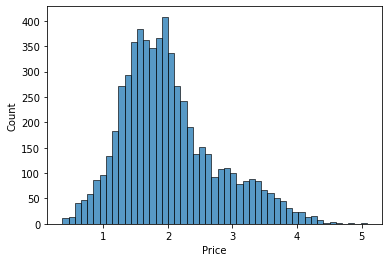

In [268]:
sns.histplot(target)

Primeira coisa a observar é que nossa variável resposta tem uma distribuição exponencial. Podemos realizar uma transformação nos dados, afim de ter essa varíavel com uma distribuição mais próxima de uma normal e facilitar nosso modelo mais a frente nesse estudo.

<AxesSubplot:xlabel='Price', ylabel='Count'>

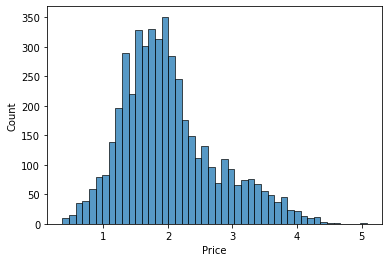

In [269]:
sns.histplot(np.log1p(strain['Price']))

In [36]:
target = np.log1p(strain['Price'])

## Encodings e Reescala de nossos dados

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

In [38]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

columns_transformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, columns_num),
        ("cat", categorical_transformer, columns_cat),],
    remainder='drop',
).fit(strain_features)


In [39]:
X_transformed = columns_transformer.transform(strain_features)

In [40]:
X_transformed.shape

(4815, 59)

In [41]:
X_transformed

<4815x59 sparse matrix of type '<class 'numpy.float64'>'
	with 57685 stored elements in Compressed Sparse Row format>

# Modelagem
--------------
## Testando diversos modelos

In [42]:
# Scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Lasso, QuantileRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [43]:
def get_models(): 
    models = dict()
    models['LR'] = LinearRegression()
    models['Lasso'] = Lasso()
    models['RF'] = RandomForestRegressor()
    models['XGBR'] = XGBRegressor()
    models['LSVM'] = LinearSVR()
    models['LGBMR'] = LGBMRegressor()
    models['GBR'] = GradientBoostingRegressor(loss='quantile')
    models['ETR'] = ExtraTreesRegressor()
    return models


def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, error_score='raise') 
    return - scores
                             

In [44]:
#Aplica os modelos.
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_transformed, target.to_numpy().reshape(-1,1))
    
    results.append(scores)
    names.append(name)
    
    r2 = cross_val_score(model, X_transformed, np.expm1(target), cv=10, scoring='r2')
    
    print('>%s root_mean_squared_error: %.3f (std: %.3f) --------- R2: %.3f' % (name, np.mean(scores), np.std(scores), np.mean(r2)))

>LR root_mean_squared_error: 0.201 (std: 0.011) --------- R2: 0.799
>Lasso root_mean_squared_error: 0.744 (std: 0.018) --------- R2: 0.346
>RF root_mean_squared_error: 0.181 (std: 0.015) --------- R2: 0.903
>XGBR root_mean_squared_error: 0.163 (std: 0.015) --------- R2: 0.911
>LSVM root_mean_squared_error: 0.204 (std: 0.013) --------- R2: 0.740
>LGBMR root_mean_squared_error: 0.168 (std: 0.015) --------- R2: 0.911
>GBR root_mean_squared_error: 0.321 (std: 0.012) --------- R2: 0.775
>ETR root_mean_squared_error: 0.173 (std: 0.011) --------- R2: 0.898


In [45]:
scores = pd.DataFrame(np.array(results).T, columns = names)

In [46]:
plt.subplots(figsize = (16, 7))
sns.boxenplot(data = scores)

<AxesSubplot:>

### Temos nosso modelo: XGBoost Regressor, apresentando menor erro entre os modelos.

In [47]:
import warnings
warnings.filterwarnings("ignore")

## Tunning
--------------
Nessa parte vamos usar o algoritimo de busca de Bayes, que apresenta um aprendizado na busca e um melhor resultado frente ao GridSearch e RandomSearch.

In [48]:
from skopt import BayesSearchCV

params = {
        'gamma': [0, 0.5, 1, 2],
        'eta': [0.1, 0.3, 0.6],
        'colsample_bytree': [0.5, 1.0],
        'max_depth': [3, 6, 7]
        }

reg_bay = BayesSearchCV(estimator = XGBRegressor(),
                    search_spaces = params,
                    n_iter = 50,
                    cv = 10,
                    n_jobs = -1,
                    scoring = 'neg_root_mean_squared_error',
                    random_state = 21)

model_bay = reg_bay.fit(X_transformed, target)

In [49]:
model_bay.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [50]:
-model_bay.best_score_

0.1600831855271292

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y,yhat):
    return np.mean(np.abs((y - yhat) / y))

def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y,yhat)
    rmse = np.sqrt(mean_squared_error(y,yhat))

    return pd.DataFrame( {'Model Name':model_name,
                        'MAE':mae,
                        'MAPE':mape,
                        'RMSE':rmse}, index=[0])

In [52]:
from sklearn.model_selection import cross_val_predict
def cross_validation(x_train, y_train, kfold, model_name, model):

    yhat_model = cross_val_predict(model, x_train, y_train, cv=kfold)

  # performance
    model_result = ml_error(model_name, np.expm1(y_train), np.expm1(yhat_model))


    return pd.DataFrame({'MODEL NAME': model_name,
                      'MAE CV': model_result['MAE'],
                      'MAPE CV': model_result['MAPE'],
                      'RMSE CV': model_result['RMSE'] }, index=[0])

In [53]:
cross_validation(X_transformed, target, 10, 'XGBoost Regressor', model_bay)

,MODEL NAME,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,1.292756,0.139847,3.181529


In [54]:
t_pred = model_bay.predict(X_transformed)
r2_score(np.expm1(target), np.expm1(t_pred))

0.9822220081911271

<AxesSubplot:xlabel='Price'>

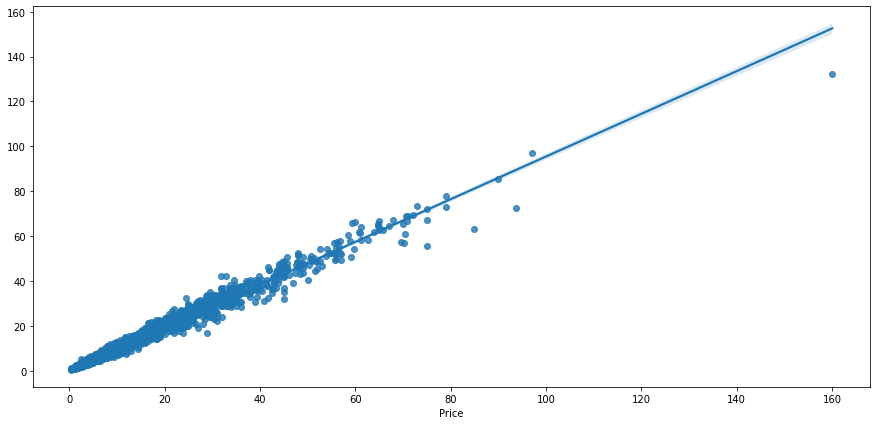

In [103]:
plt.figure(figsize = (15,7))
sns.regplot(x = strat_train_set['Price'], y = np.expm1(t_pred))

In [56]:
XGb_model = model_bay.best_estimator_

# Avaliação do Modelo
Agora que temos um modelo, vamos aplicar as transformações necessárias no conjunto de validação e realizar predições com o XGboost, para vermos como ele se sai com um conjunto de dados "novo".

In [57]:
strat_val_set

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
658,Toyota Corolla Executive (HE),Chennai,2007,89000,Petrol,Manual,First,13.4 kmpl,1794 CC,125 bhp,5.0,NaN,3.00
4779,Mercedes-Benz B Class B200 CDI,Bangalore,2016,36610,Diesel,Automatic,First,15.0 kmpl,2143 CC,107.3 bhp,5.0,NaN,19.90
1502,Mercedes-Benz New C-Class C 200 CGI Avantgarde,Mumbai,2011,40000,Petrol,Automatic,Second,11.74 kmpl,1796 CC,186 bhp,5.0,NaN,14.50
713,Hyundai Xcent 1.2 Kappa SX Option,Kochi,2015,41721,Petrol,Manual,First,19.1 kmpl,1197 CC,82 bhp,5.0,NaN,4.70
297,Hyundai i10 Magna 1.2 iTech SE,Pune,2012,45275,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,17.89
4035,Maruti A-Star Lxi,Delhi,2010,70000,Petrol,Manual,First,19.0 kmpl,998 CC,66.1 bhp,5.0,NaN,2.00
4409,Skoda Superb 2.8 V6 AT,Kolkata,2005,13002,Petrol,Automatic,First,9.3 kmpl,2771 CC,193.1 bhp,5.0,NaN,3.25
3268,Mercedes-Benz GLE 350d,Coimbatore,2018,29277,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,95.13 Lakh,59.65


In [58]:
strat_val_setc = strat_val_set.copy()

In [59]:
# Tranformando as colunas numericas que estão como object para o formato numerico

strat_val_setc.New_Price = pd.to_numeric(strat_val_setc.New_Price.str.split().str[0], errors='coerce')
strat_val_setc.Mileage = pd.to_numeric(strat_val_setc.Mileage.str.split().str[0], errors='coerce')
strat_val_setc.Engine = pd.to_numeric(strat_val_setc.Engine.str.split().str[0], errors='coerce')
strat_val_setc.Power = pd.to_numeric(strat_val_setc.Power.str.split().str[0], errors='coerce')

In [60]:
marcas(strat_val_setc, 'Name')
strat_val_setc.drop(['Name'], axis = 1, inplace = True)

In [61]:
limpa_mileage(strat_val_setc)
tranformacao_monetaria(strat_val_setc)

In [62]:
# Separando as labels

price_val_set = strat_val_setc['Price']
val_set = strat_val_setc.drop(columns='Price')

In [63]:
val_set.sample(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
4308,Coimbatore,2014,53817,Diesel,Manual,First,25.47,1248.0,88.5,7.0,11.44,Maruti
5430,Bangalore,2012,65000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,Volkswagen
512,Kochi,2019,8587,Petrol,Manual,First,15.29,1591.0,121.3,5.0,NaN,Hyundai


In [64]:
# Prep

# Aplicando a transformação log(1 + x)
price_val_set = np.log1p(price_val_set)


# Transformação (Dummies + Imputer + Scaler)
val_set_transformed = columns_transformer.transform(val_set)

In [65]:
# Predições

pred_val = XGb_model.predict(val_set_transformed)

In [66]:
# Avaliação

ml_error('XGBoost Regressor', np.expm1(price_val_set), np.expm1(pred_val))

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,1.469087,0.164813,4.091774


Nosso modelo se saiu muito bem no novo conjunto de dados!

<AxesSubplot:xlabel='Price'>

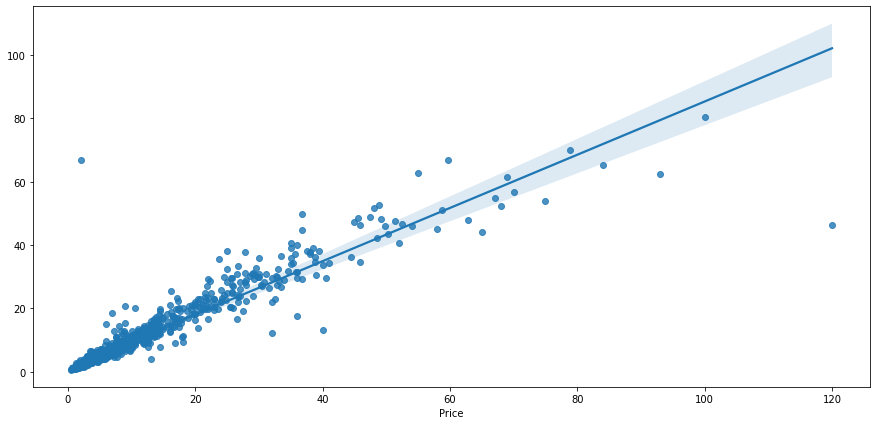

In [109]:
plt.figure(figsize = (15,7))
sns.regplot(x = np.expm1(price_val_set), y = np.expm1(pred_val))

## Análise de Resíduos

In [68]:
plt.figure(figsize = (15,7))
sns.residplot(x = np.expm1(price_val_set), y = np.expm1(pred_val))

<AxesSubplot:xlabel='Price'>

In [69]:
resid = (np.expm1(price_val_set) - np.expm1(pred_val))

In [70]:
resid

658     0.532668
4779   -1.321539
1502    2.706925
713    -0.193522
297    -0.206777
          ...   
2530    6.769901
4035    0.067432
4409   -0.038803
3268   -7.117685
2518    0.176897
Name: Price, Length: 1204, dtype: float64

In [71]:
from scipy.stats import shapiro, kurtosis, skew

shap_stat, pvalor = shapiro(resid)

print(f'Série {"não " if pvalor<0.05 else ""}acompanha uma distribuição Normal.')

Série não acompanha uma distribuição Normal.


In [87]:
sns.histplot(resid, kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

In [73]:
kurtosis(resid)

145.47301201387884

In [74]:
skew(resid)

2.7205952229165375

* Podemos ver nos resíduos nitidamente que se trata de uma distribuição leptocúrtica, onde $C=\dfrac{Q_3-Q_1}{2(C_{90}-C_{10})}>>>0,263$


* Se trata também de um distribuição assimétrica positiva, $\hat{y} > M_d > M_o$


* Mesmo assim nosso modelo obteve um bom resultado! Mas os próximos passos seria tratar nossos dados afim de encontrar a distribuição dos resíduos mais próximo possível de uma normal.


### Caminhos para melhorar ainda mais nosso desemprenho:

1. Aplicação de algum tipo de transformação nos dados, buscando discriminar mais a variância destes.
2. Análise de seleção de variáveis para o modelo proposto 
3. Análise diagnostica para identificar pontos problemáticos no modelo reduzido

------------------------------------
# Modelo selecionado, hora das aplicações

## Retreinando nosso modelo com todo o conjunto de dados para aumentar o poder preditivo

In [204]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [205]:
target = np.log1p(train['Price'])
train_features = train.drop(columns='Price')

In [207]:
# Pegando a marca do carro

marcas(train_features, 'Name')
train_features.drop(['Name'], axis = 1, inplace = True)

In [208]:
# Tranformando as colunas numericas que estão como object para o formato numerico

train_features.New_Price = pd.to_numeric(train_features.New_Price.str.split().str[0], errors='coerce')
train_features.Mileage = pd.to_numeric(train_features.Mileage.str.split().str[0], errors='coerce')
train_features.Engine = pd.to_numeric(train_features.Engine.str.split().str[0], errors='coerce')
train_features.Power = pd.to_numeric(train_features.Power.str.split().str[0], errors='coerce')

In [209]:
# Removendo zeros na variável Mileage

limpa_mileage(train_features)

In [210]:
# OneHotEncode + Imputers
    
train_set_pronto = columns_transformer.transform(train_features)

In [211]:
model_bay.best_params_

OrderedDict([('colsample_bytree', 0.5),
             ('eta', 0.1),
             ('gamma', 0.0),
             ('max_depth', 7)])

In [212]:
# Predições

#XGBR = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, gamma = 0.0, max_depth = 7)
XGb_model.fit(train_set_pronto, target)

pred_train = XGb_model.predict(train_set_pronto)

In [217]:
aux = pd.DataFrame({'Preço Real': np.expm1(target)})
aux['Preço Estimado'] = np.expm1(pred_train)
aux

,Preço Real,Preço Estimado
0,1.75,2.029160
1,12.50,10.551279
2,4.50,3.602780
3,6.00,5.611058
4,17.74,17.075544
...,...,...
6014,4.75,4.825340
6015,4.00,4.237104
6016,2.90,3.754012
6017,2.65,2.545437


<AxesSubplot:xlabel='Preço Real', ylabel='Preço Estimado'>

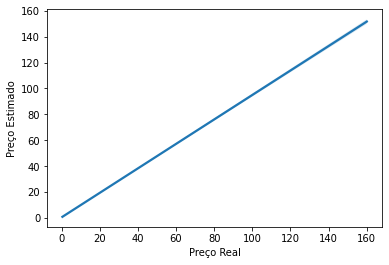

In [220]:
sns.regplot(x = aux['Preço Real'], y = aux['Preço Estimado'], scatter=False)

## Aplicando nosso modelo nos dados de teste

In [221]:
test_way = r'..\Used Cars Price Prediction\archive (2)\test-data.csv'

teste = pd.read_csv(test_way)

In [222]:
teste

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [223]:
test = teste.copy()

In [224]:
# Dropando a colunas que veio como index

test.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [225]:
# Pegando a marca do carro

marcas(test, 'Name')
test.drop(['Name'], axis = 1, inplace = True)

In [226]:
# Tranformando as colunas numericas que estão como object para o formato numerico

test.New_Price = pd.to_numeric(test.New_Price.str.split().str[0], errors='coerce')
test.Mileage = pd.to_numeric(test.Mileage.str.split().str[0], errors='coerce')
test.Engine = pd.to_numeric(test.Engine.str.split().str[0], errors='coerce')
test.Power = pd.to_numeric(test.Power.str.split().str[0], errors='coerce')

In [227]:
# Removendo zeros na variável Mileage

limpa_mileage(test)

In [228]:
# OneHotEncode + Imputers
    
test_set_pronto = columns_transformer.transform(test)

In [229]:
# Predições

pred_test = XGb_model.predict(test_set_pronto)

In [230]:
new_df = test.copy()
new_df['Price'] = np.expm1(pred_test)
new_df['Price'] = new_df['Price'].apply(lambda x: round(x, 2)) 

In [231]:
new_df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Price
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,Maruti,2.89
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN,Maruti,3.01
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27,Toyota,18.12
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,Toyota,4.72
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,Hyundai,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen,4.33
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,Volkswagen,5.97
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,Nissan,2.84
1232,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,Volkswagen,5.03


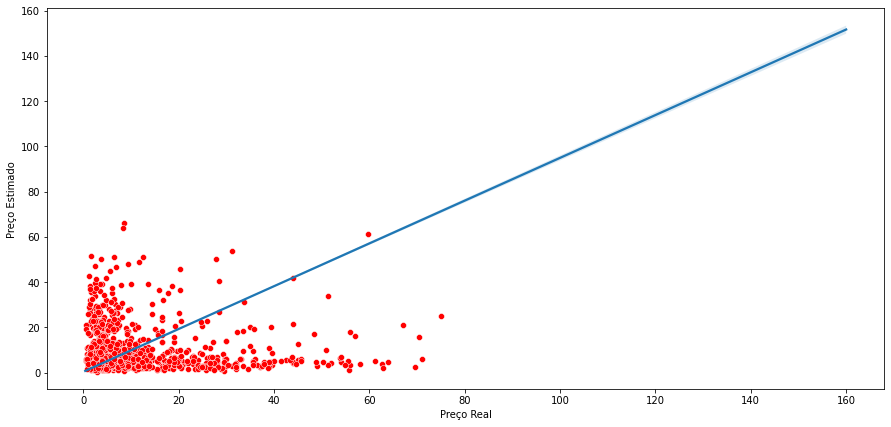

In [264]:
fig, ax = plt.subplots(figsize = (15, 7))
fig = sns.regplot(x = aux['Preço Real'], y = aux['Preço Estimado'], scatter=False)
fig = sns.scatterplot(x= aux['Preço Real'], y=new_df['Price'], color='red')

In [267]:
new_df['Price'].sort_values()

734      0.52
557      0.87
919      0.88
278      0.97
25       0.99
        ...  
1075    51.63
975     53.87
941     61.38
945     63.72
193     66.35
Name: Price, Length: 1234, dtype: float64